In [17]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('../paper.mplstyle')

/home/jlazar/.local/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


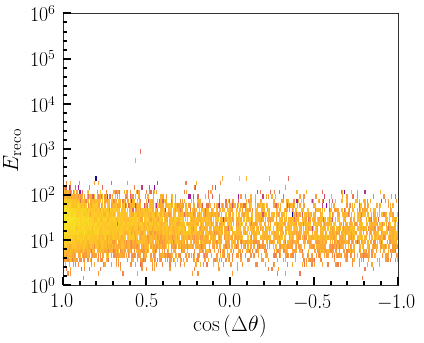

In [21]:
dist = np.sum(np.load('../data/distributions/ch5-m100_oscNext_pisa_genie_0000_v02.npy'), axis=2)
fig, ax = plt.subplots(figsize=(6,5))

im = ax.imshow(np.log10(dist[::-1].T[::-1]), 
              aspect='auto',
              extent=[1,-1,0,6]
             )

ax.set_xlabel(r'$\cos\left(\Delta\theta\right)$', fontsize=22)
ax.set_ylabel(r'$E_{\rm{reco}}$', fontsize=22)

ytick_pos = [0,1,2,3,4,5,6]
ax.set_yticklabels([r'$10^{%d}$' % x for x in ytick_pos])
ax.set_yticks(ytick_pos)

plt.show()